In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

### Define a function called parser which adds 190 to the date column and returns it in the YYYY MM format
### Parse datses argument means we want pandas to recognise the first column as date
### Index_col means date column (column 0) will become the Index column
### Squeeze=true means that if the data we are going through has only one column, return a series

In [4]:
def parser(x):
	return pd.datetime.strptime('190'+x, '%Y-%m')

series=pd.read_csv('electric.csv', parse_dates=[0], index_col=0, squeeze= True)

In [5]:
series.head()

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
Name: IPG2211A2N, dtype: float64

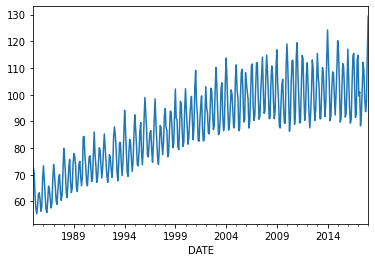

In [6]:
series.plot()
plt.show()

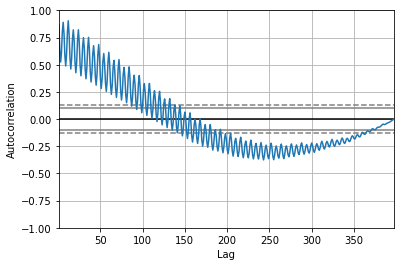

In [9]:
autocorrelation_plot(series)
plt.show()

### Create arima model and fit it but do not display it when showing the summary. This is what disp=0 means

In [12]:
model=ARIMA(series, order=(5,1,0))
model_fit=model.fit(disp=0)
print(model_fit.summary)

C:\Users\Dell\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARIMAResults object at 0x148D94F0>>


### A plot of residuals how bad our prediction is from the actual values

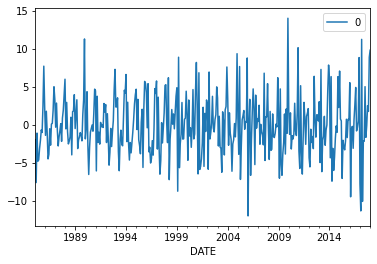

In [13]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

### An error density plot to show the density of residuals using kernel density estimation plot 

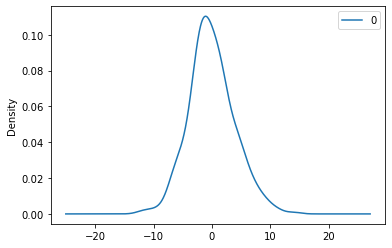

In [14]:
residuals.plot(kind='kde')
plt.show()

In [15]:
residuals.describe()

,0
count,396.000000
mean,-0.031611
std,3.892166
min,-11.986255
25%,-2.473487
50%,-0.423264
75%,2.150152
max,14.032372


### Turn your series into a list

In [16]:
X = series.values
X

array([ 72.5052,  70.672 ,  62.4502,  57.4714,  55.3151,  58.0904,
        62.6202,  63.2485,  60.5846,  56.3154,  58.0005,  68.7145,
        73.3057,  67.9869,  62.2221,  57.0329,  55.8137,  59.9005,
        65.7655,  64.4816,  61.0005,  57.5322,  59.3417,  68.1354,
        73.8152,  70.062 ,  65.61  ,  60.1586,  58.8734,  63.8918,
        68.8694,  70.0669,  64.1151,  60.3789,  62.4643,  70.5777,
        79.8703,  76.1622,  70.2928,  63.2384,  61.4065,  67.1097,
        72.9816,  75.7655,  67.5152,  63.2832,  65.1078,  73.8631,
        77.9188,  76.6822,  73.3523,  65.1081,  63.6892,  68.4722,
        74.0301,  75.0448,  69.3053,  65.8735,  69.0706,  84.1949,
        84.3598,  77.1726,  73.1964,  67.2781,  65.8218,  71.4654,
        76.614 ,  77.1052,  73.061 ,  67.4365,  68.5665,  77.6839,
        86.0214,  77.5573,  73.365 ,  67.15  ,  68.8162,  74.8448,
        80.0928,  79.1606,  73.5743,  68.7538,  72.5166,  79.4894,
        85.2855,  80.1643,  74.5275,  69.6441,  67.1784,  71.2

### create a variable that returns 66% of your dataset as your training set

In [17]:
size = int(len(X) * 0.66)
size

262

define the size of your training and testing dataset

In [19]:
train, test = X[0:size], X[size:len(X)]
print(train)
print("--------------------")
print(test)

[ 72.5052  70.672   62.4502  57.4714  55.3151  58.0904  62.6202  63.2485
  60.5846  56.3154  58.0005  68.7145  73.3057  67.9869  62.2221  57.0329
  55.8137  59.9005  65.7655  64.4816  61.0005  57.5322  59.3417  68.1354
  73.8152  70.062   65.61    60.1586  58.8734  63.8918  68.8694  70.0669
  64.1151  60.3789  62.4643  70.5777  79.8703  76.1622  70.2928  63.2384
  61.4065  67.1097  72.9816  75.7655  67.5152  63.2832  65.1078  73.8631
  77.9188  76.6822  73.3523  65.1081  63.6892  68.4722  74.0301  75.0448
  69.3053  65.8735  69.0706  84.1949  84.3598  77.1726  73.1964  67.2781
  65.8218  71.4654  76.614   77.1052  73.061   67.4365  68.5665  77.6839
  86.0214  77.5573  73.365   67.15    68.8162  74.8448  80.0928  79.1606
  73.5743  68.7538  72.5166  79.4894  85.2855  80.1643  74.5275  69.6441
  67.1784  71.2078  77.5081  76.5374  72.3541  69.0286  73.4992  84.5159
  87.9464  84.5561  79.4747  71.0578  67.6762  74.3297  82.1048  82.0605
  74.6031  69.681   74.4292  84.2284  94.1386  87.1

In [20]:
history = list(train)
predictions=[]

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print("Predicted= ", yhat, " actual= ", obs, " at time ", t)

Predicted=  92.95787559148167  actual=  92.3566  at time  0
Predicted=  102.04537144049166  actual=  103.066  at time  1
Predicted=  111.62381749576416  actual=  112.0576  at time  2
Predicted=  109.15200755361478  actual=  111.8399  at time  3
Predicted=  102.33126090044584  actual=  99.1925  at time  4
Predicted=  90.88893360416415  actual=  90.8177  at time  5
Predicted=  92.9796329653065  actual=  92.0587  at time  6
Predicted=  102.0553674364082  actual=  100.9676  at time  7
Predicted=  110.01870325962614  actual=  107.5686  at time  8
Predicted=  107.10612240925673  actual=  114.1036  at time  9
Predicted=  106.83734596862604  actual=  101.5316  at time  10
Predicted=  92.12592430554835  actual=  93.0068  at time  11
Predicted=  92.88349088983514  actual=  93.9126  at time  12
Predicted=  101.107784433773  actual=  106.7528  at time  13
Predicted=  115.58719341697719  actual=  114.8331  at time  14
Predicted=  112.86439177933654  actual=  108.2353  at time  15
Predicted=  98.709

In [22]:
error = mean_squared_error(test, predictions)
print("Test MNSE error= ", error)

Test MNSE error=  19.29728925283016


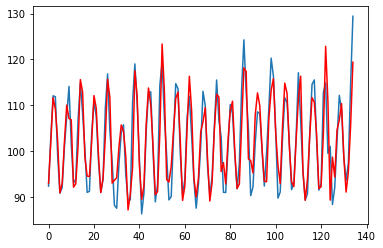

In [23]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()